This notebook explains the dimensionality reduction technique by applying PCA using sklearn

In [96]:
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
#Read the dataset customer satisfication
wine_quality_df = pd.read_csv('winequality-red.csv',sep=';')
wine_quality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine_quality_df.shape

(1599, 12)

In [15]:
#print the info about the dataset to know about the null values
#to explain the column types
wine_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
wine_quality_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
#print the total number of columns with nullable values
sum(wine_quality_df.isnull().sum())

0

There are totally 1599 rows and 12 columns(including target).Let's apply the PCA to reduce the dimensionality and extract the feature importance.

In [18]:
#Describe the data to check for the distribution of the values
#If there is much deviation of data between different independent attributes
#scaling is required
wine_quality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
wine_quality_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

(12.0, 0.0)

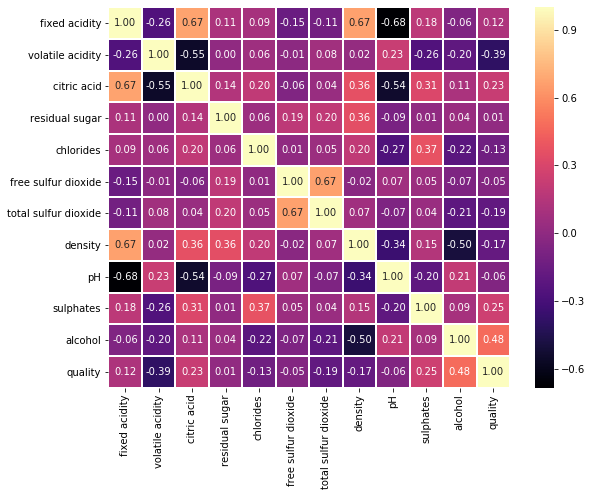

In [34]:
#create a heatmap to see the relation between the variables. 
fig,ax = plt.subplots(figsize=(9,7))
a1 = sns.heatmap(wine_quality_df.corr(), ax = ax,annot=True,linewidths=1,fmt='.2f',cmap='magma')
bottom, top = a1.get_ylim()
a1.set_ylim(bottom + 0.5, top - 0.5)

Inference:    
1) There is a significant positive correlation between fixed acidity and citric acid         
2) There is a significant positive correlation between fixed acidity and density       
3) There is a significant negative correlation between fixed acidity and pH   
4) There is a notable negative correlation between citric acid and volatile acidity   
5) There is a negative correlation between citric acid and pH   
6) There exist a relation between total sulfur dioxide and free sulfur dioxide 
7) A strong negative relation between density and alcohol could be noticed   
8) A positive dependency between alcohol and quality   


Conclusion:    
Based on the above relations, it can be concluded that variance within different variables can be compressed into fewer attributes.

In [46]:
#seggregate the data into input and output
X = wine_quality_df.drop('quality',axis=1)
y = wine_quality_df['quality']

#before spliting the data, apply zscore to ensure all the variables
#are given equal importance
Xscaled = X.apply(zscore)

In [47]:
train_x,test_x,train_y,test_y = train_test_split(Xscaled,y,test_size=0.3)

In [52]:
#Define PCA algorithm
pca = PCA(n_components = 11)

#fit the input train data to find the eigen vectors and eigen values
pca.fit(train_x)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
#print the explained variance which corresponds to the eigen values
print("List of eigen values:\n",pca.explained_variance_)

#print the ratio of eigen values to know the percentage
print("\nRatio of eigen values:\n",pca.explained_variance_ratio_)

List of eigen values:
 [3.25662716 1.94235652 1.55190241 1.31429354 0.93259519 0.65020321
 0.61973685 0.44678985 0.35229708 0.18511495 0.05832974]

Ratio of eigen values:
 [0.287936   0.17173423 0.13721208 0.11620379 0.08245578 0.05748798
 0.05479428 0.0395031  0.03114849 0.01636701 0.00515725]


In [60]:
#Printing the eigen vectors
print("List of eigen vectors:\n",pca.components_)

List of eigen vectors:
 [[ 0.47559836 -0.22244289  0.44414734  0.12912177  0.25833009 -0.02787855
   0.03902808  0.39538322 -0.43935833  0.27037493 -0.13742265]
 [-0.14289745  0.22931363 -0.12572614  0.29873594  0.12870242  0.55653784
   0.6155614   0.17097059  0.02130409 -0.01569585 -0.29461783]
 [-0.16078373 -0.4812534   0.24516172  0.05150114 -0.02599303  0.30772334
   0.23371397 -0.37054504  0.07909871  0.39617011  0.47883673]
 [-0.2489649   0.18783508 -0.15568782 -0.32886465  0.68253408 -0.08609513
  -0.08912005 -0.15138638 -0.00357709  0.48888995 -0.16490076]
 [-0.05555555  0.2473958  -0.02683944  0.74723209  0.2605292  -0.17000096
  -0.23414989  0.13741826  0.22053308  0.10744456  0.38205737]
 [-0.00757903  0.11216052  0.16723248  0.04462977  0.41199292 -0.004058
   0.10968813 -0.43327908 -0.44729398 -0.58492184  0.21373279]
 [-0.34999689 -0.63845263  0.05004592  0.24594552  0.2375511  -0.0880002
  -0.15909813  0.02018805  0.19042522 -0.27318181 -0.45398483]
 [-0.20218785 -0.037

Inferring the eigen values to know the weightage to be given for each vector

Text(0, 0.5, 'variance ratio explained')

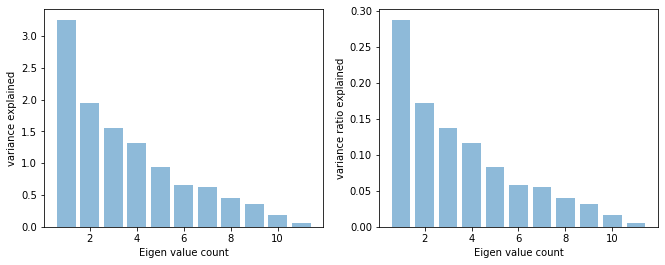

In [90]:
#plot the eigen values and ratios to see the contribution of each eigenvalue
#to the total variance of the data
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.bar(range(1,12),pca.explained_variance_,align='center',alpha=0.5)
plt.xlabel('Eigen value count')
plt.ylabel('variance explained')

plt.subplot(1,2,2)
plt.bar(range(1,12),pca.explained_variance_ratio_,align='center',alpha=0.5)
plt.xlabel('Eigen value count')
plt.ylabel('variance ratio explained')


Inference:
As noticed from the above graph, the first few eigen values have higher variance explained.

Text(0, 0.5, 'variablity explained')

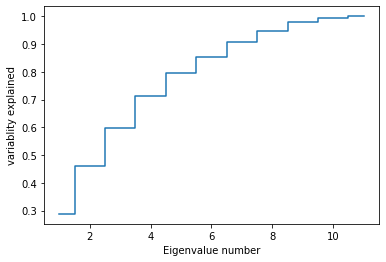

In [103]:
#plotting cummulative values of the eigen value ratio to understand where
#the significant change happens
plt.step(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.xlabel('Eigenvalue number')
plt.ylabel('variablity explained')

Conclusion : Let us pick the count as 6. After that the variablity becomes very small

In [104]:
pca =PCA(n_components=6)
pca.fit(train_x)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [106]:
train_x_pca = pca.transform(train_x)

In [108]:
#compare the original shape of the data and the new pca transformed data
print('shape of original data:  ',train_x.shape)
print('\nshape of original data:  ',train_x_pca.shape)

shape of original data:   (1119, 11)

shape of original data:   (1119, 6)
